# Introduction to Scikit-Learn (sklearn)

what we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algortihm for our problems (Model)
3. Fit the model/algorithm and use it to make predictions on our data 
4. Evaluating a model (Model değerlendirme)
5. Improve a model (Modeli geliştirin)
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1.Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


In [7]:
# make a prediction
import numpy as np
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1


In [12]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [13]:
y_test

255    0
71     1
32     1
17     1
132    1
      ..
72     1
162    1
204    0
291    0
108    1
Name: target, Length: 61, dtype: int64

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [15]:
clf.score(X_test, y_test)

0.8688524590163934

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [17]:
confusion_matrix(y_test, y_preds)

array([[23,  5],
       [ 3, 30]], dtype=int64)

In [18]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [19]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    # clf = RandomForestClassifier(n_estimators=i)
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.89%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 88.52%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 85.25%

Trying model with 70 estimators...
Model accuracy on test set: 85.25%

Trying model with 80 estimators...
Model accuracy on test set: 88.52%

Trying model with 90 estimators...
Model accuracy on test set: 88.52%



In [20]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [21]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8852459016393442

# 1. Getting our data ready to be used with machine learning
Three main thing we have to do:

1- Split the data info features and labels (usually `X` & `y`)

1- Verileri özelliklere ve etiketlerine göre bölün (genellikle `X` & `y


2- Filling (also called imputing) or disregarding missing values

2- Eksik değerlerin doldurulması (aynı zamanda atfetdilmesi de denir) ve ya göz ardı edilmesi


3- Converting non-numerical values to numerical values (also called feature encoding)

3- Sayısal olmayan değerleri sayısal değerlere dönüştürme (ayrıca özellik kodlaması da denir)


In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape

(303, 13)

In [28]:
len(heart_disease)

303

In [29]:
X.shape[0] * 0.8

242.4

In [30]:
242 + 61

303

In [31]:
# Clean Data --> Transform Data --> Reduce Data

## 1.1 Make sure it's all numerical

In [32]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [36]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [37]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [38]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",       # tuple listesinin ismi
                                   one_hot,        # dönüştürücüyü yazacağız
                                   categorical_features)],     # dönüştüreceğimiz sütunların özelliklerini vericez
                                   remainder="passthrough")    # geriye kalan sütunlara hiçbir şey yapma

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


![](images/one-hot-encoding.png)

In [42]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation) 'imputation=atama'
2. Remove the samples with missing data altogether

In [45]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Create X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [48]:
# Let's try and convert our data to number
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",       # tuple listesinin ismi
                                   one_hot,        # dönüştürücüyü yazacağız
                                   categorical_features)],     # dönüştüreceğimiz sütunların özelliklerini vericez
                                   remainder="passthrough")    # geriye kalan sütunlara hiçbir şey yapma

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [49]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [50]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [51]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean, inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [52]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_sales_missing)

950

In [56]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [57]:
# Let's try and convert our data to number
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",       # tuple listesinin ismi
                                   one_hot,        # dönüştürücüyü yazacağız
                                   categorical_features)],     # değiştireceğimiz sütunların özelliklerini vericez
                                   remainder="passthrough")    # geriye kalan sütunlara hiçbir şey yapma

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill missing values with Scikit-Learn

In [58]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [59]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
# Drop the rows with no labels
car_sales_missing.dropna(subset="Price", inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [62]:
# Check missing value
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [63]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") 
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (samething that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [64]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training 
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [65]:
# Check to see the original
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [66]:
# Now let's one hot encode the features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

#  Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [67]:
# Now we're transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

In [68]:
# Check length of transformed data
len(transformed_X_train.toarray()) + len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   <--
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme)
5. Improve a model (Modeli geliştirin)
6. Save and load  a trained model
7. Putting it all together!

# 2.Choosing the right estimator/algorithm for your problem

somethings to note:

* Sklearn refers to machine learning model, algorithm as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf`(short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working a on machine learning problem and looking to use sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [69]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [70]:
housing_df = pd.DataFrame(housing["data"])
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [71]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df["Target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000s (ortalama ev fiyatı 100.000$)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440131

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model.

How about we try an ensemle model (an ensemble is combination of smaller models to try and make metter predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [74]:
# Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"] # median house price in $100,000s (ortalama ev fiyatı 100.000$)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Choosing an estimator for a classification problem

Let's go to the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [78]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [80]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [81]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [82]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [83]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data <-- (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme)
5. Improve a model (Modeli geliştirin)
6. Save and load  a trained model
7. Putting it all together!

# 3. Fit the model/algorithm on our data and use it to make predictions

### 3. Fitting model to the data

Different names for:
    
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [84]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [86]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning mnodel

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [87]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this doesn't work...

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [88]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [89]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [90]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)   

0.8524590163934426

In [92]:
clf.score(X_test, y_test)

0.8524590163934426

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [94]:
# predict_proba() returns probabilities of a classification model
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [95]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [96]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models.

In [97]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [99]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [100]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [101]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [102]:
housing_df["Target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme) <---
5. Improve a model (Modeli geliştirin)
6. Save and load  a trained model
7. Putting it all together!

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem- specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [103]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [105]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` on our regression problem

In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
# The default score() evaluation metric is r_squared for regression algortihms
# Highest = 1.0 lowest = 0.0
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using `scoring` parameter

In [108]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
clf.score(X_test, y_test)

0.8524590163934426

In [110]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![](images/cross-validation.png)

In [111]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [112]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [113]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [114]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [115]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [117]:
np.mean(cross_val_score)

0.8248087431693989

In [118]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [119]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [121]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [122]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

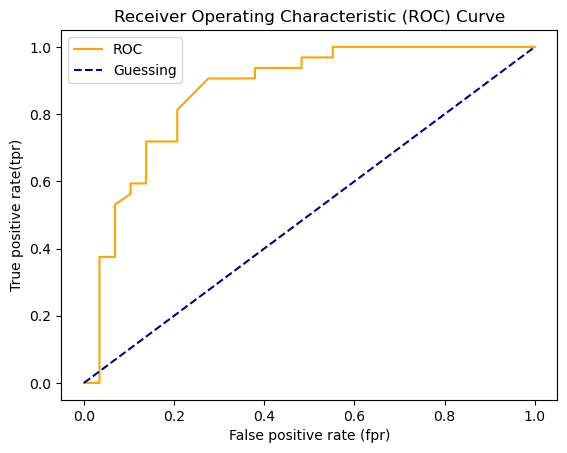

In [123]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [124]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

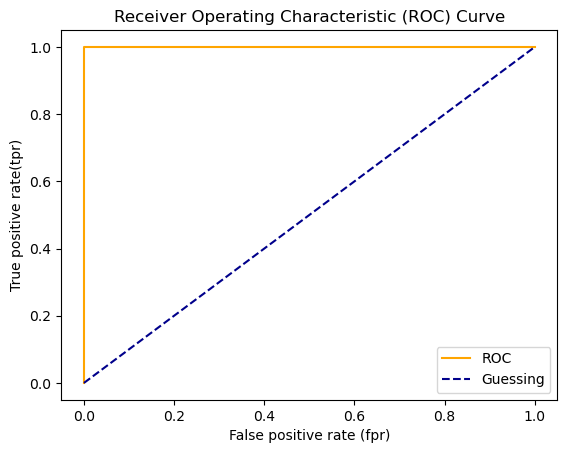

In [125]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

`ROC eğrisi`: farklı sınıflandırma eşiklerinde gerçek pozitif oranı (tpr) ile yanlış pozitif oranı (fpr) karşılaştırır.
    
`AUC ölçümü`: modelinizin sınıflar arasında seçim yapmada ne kadar iyi olduğunu gösterir (örneğin, birinin kalp hastalığı 
            olup olmadığına karar vermede ne kadar iyi). Mükemmel bir model 1 AUC puanı alacaktır.

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, this gives you an idea of where the model is getting confused

In [126]:
# See here for sklearn confusion_matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [127]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


![](images/confusion-matrix-anatomy.png)

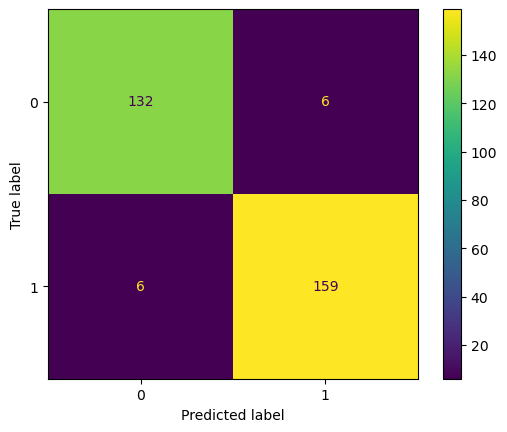

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

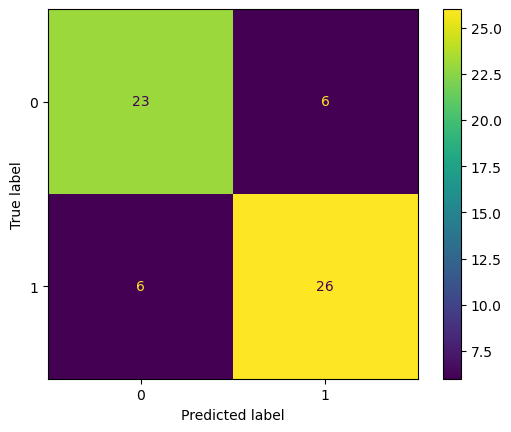

In [129]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

**Classification Report**

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



![](images/classification-report-anatomy.png)

* Precision(Kesinlik) - Pozitif tanımlamaların oranını gösterir (model
aslında doğru olan sınıf 1'i tahmin etti. Üreten bir model
hiçbir yanlış pozitifin kesinliği 1,0 değildir.
* Recall(Geri Çağırma) - Doğru şekilde tespit edilen gerçek pozitiflerin oranını gösterir.
sınıflandırılmıştır. Hiçbir yanlış negatif üretmeyen bir modelin hatırlama oranı 1,0'dır.
* F1 score (F1 puanı) - Hassasiyet ve hatırlamanın birleşimi. Mükemmel bir model
F1 puanı 1,0'a ulaşır.
* Support(Destek) - Her metriğin hesaplandığı örnek sayısı.
* Accuracy(Doğruluk) - Modelin ondalık formdaki doğruluğu. Mükemmel doğruluk
1,0'a eşittir.
* Macro avg(Makro avg) - Makro ortalamanın kısaltması, ortalama hassasiyet, geri çağırma ve
Sınıflar arasında F1 puanı. Makro ortalama dengesizliği sınıflandırmıyor
Bu nedenle sınıf dengesizlikleriniz varsa bu ölçüye dikkat edin.
* Weighted avg(Ağırlıklı ortalama) - Ağırlıklı ortalamanın kısaltması, ağırlıklı ortalama
sınıflar arasında kesinlik, hatırlama ve F1 puanı. Ağırlıklı her biri anlamına gelir
metrik, her birinde kaç tane örnek bulunduğuna göre hesaplanır
sınıf. Bu ölçü çoğunluk sınıfını destekleyecektir (örneğin yüksek bir değer verecektir)
daha fazla örnek olması nedeniyle bir sınıf diğerini gerçekleştirdiğinde).

In [131]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics
model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

1. R^2(pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**
What R-squadred does: Compares your model predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.For example, if all your model does if predict the mean of the targets, it's R^2 value would be. 0. and if your model perferctly predicts a range of numbers its R^2 value would be 1

In [132]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
model.score(X_test, y_test)

0.8065734772187598

In [134]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [135]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [136]:
y_test.mean()

2.0550030959302323

In [137]:
from sklearn.metrics import r2_score

# Fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [140]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [141]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [143]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [144]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [145]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [147]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [148]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [149]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [151]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [153]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [154]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [155]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [156]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [157]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7334180712088106

**Which regression metric should you use?**
* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing.
Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly
how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between
predicted values and actual values, it amplifies larger differences. Let's say we're predicting the
value of houses (which we are).
    * Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off.
    * Pay more attention to MSE: When being 10,000 off is more than twice as bad as being
    5,000 off.

Makine Öğrenimi Modeli Değerlendirmesi
Bir makine öğrenimi modelinin sonuçlarını değerlendirmek, bir model oluşturmak kadar önemlidir.

Ancak farklı problemlerin farklı makine öğrenimi modellerine sahip olması gibi, farklı makine öğrenimi modellerinin de farklı değerlendirme ölçümleri vardır.

Aşağıda, sınıflandırma ve regresyon modelleri için incelemek isteyeceğiniz en önemli değerlendirme metriklerinden bazıları yer almaktadır.


##### Sınıflandırma Modeli Değerlendirme Metrikleri/Teknikleri

Doğruluk - Modelin ondalık biçimdeki doğruluğu. Mükemmel doğruluk 1,0'a eşittir.

Kesinlik - Gerçekte doğru olan pozitif tanımlamaların (model tahmin edilen sınıf 1) oranını gösterir. Hiçbir yanlış pozitif üretmeyen bir modelin kesinliği 1,0'dır.

Geri Çağırma - Doğru şekilde sınıflandırılan gerçek pozitiflerin oranını gösterir. Hiçbir yanlış negatif üretmeyen bir modelin hatırlama oranı 1,0'dır.

F1 puanı - Hassasiyet ve hatırlamanın birleşimi. Mükemmel bir model F1 puanı 1,0'dır.

Karışıklık matrisi - Tahmin edilen değerleri gerçek değerlerle tablo şeklinde karşılaştırır, %100 doğruysa matristeki tüm değerler sol üstten sağ alta (çapraz çizgi) olacaktır.

Çapraz doğrulama - Veri kümenizi birden çok parçaya böler ve modelinizi her parça üzerinde eğitip test eder, ardından performansı ortalama olarak değerlendirir.

Sınıflandırma raporu - Sklearn , hassasiyet, geri çağırma ve f1 puanı gibi ana sınıflandırma metriklerinden bazılarını döndüren yerleşik bir işleve sahiptirclassification_report()

ROC Eğrisi - Alıcı çalışma karakteristiği olarak da bilinen,gerçek pozitif oranın yanlış pozitif orana karşı grafiğidir.

Eğri Altındaki Alan (AUC) Puanı - ROC eğrisinin altındaki alan. Mükemmel bir model 1,0 AUC puanına ulaşır.



##### Hangi sınıflandırma metriğini kullanmalısınız?

Doğruluk, tüm sınıfların dengeli olması durumunda (örneğin, 0 veya 1 ile etiketlenmiş aynı miktarda örnek) başlangıç ​​için iyi bir ölçümdür.

Sınıflar dengesiz olduğunda kesinlik ve hatırlama daha önemli hale gelir.

Yanlış pozitif tahminler, yanlış negatif tahminlerden daha kötüyse, daha yüksek kesinliği hedefleyin.

Yanlış negatif tahminler, yanlış pozitif tahminlerden daha kötüyse, daha yüksek hatırlamayı hedefleyin.

F1 puanı, hassasiyet ve hatırlamanın birleşimidir.

Karışıklık matrisi, bir sınıflandırma modelinin nasıl gittiğini görselleştirmenin her zaman iyi bir yoludur.


##### Regresyon Modeli Değerlendirme Metrikleri/Teknikleri

R^2 (r-kare olarak telaffuz edilir) veya belirleme katsayısı - Modelinizin tahminlerini hedeflerin ortalamasıyla karşılaştırır. Değerler negatif sonsuzluktan (çok zayıf bir model) 1'e kadar değişebilir. Örneğin, modelinizin yaptığı tek şey hedeflerin ortalamasını tahmin etmekse, R^2 değeri 0 olacaktır. Ve eğer modeliniz bir sayı aralığını mükemmel bir şekilde tahmin ediyorsa R^2 değeri 1 olacaktır.

Ortalama mutlak hata (MAE) - Tahminler ile gerçek değerler arasındaki mutlak farkların ortalaması. Tahminlerinizin ne kadar yanlış olduğu konusunda size bir fikir verir.

Ortalama karesel hata (MSE) - Tahminler ve gerçek değerler arasındaki ortalama karesel farklar. Hataların karesinin alınması negatif hataları ortadan kaldırır. Aynı zamanda aykırı değerleri (daha büyük hatalara sahip örnekler) güçlendirir.


##### Hangi regresyon metriğini kullanmalısınız?

R2 doğruluğa benzer. Modelinizin ne kadar iyi performans gösterebileceğinin hızlı bir göstergesini verir. Genel olarak R2 değeriniz 1,0'a ne kadar yakınsa model o kadar iyidir. Ancak her tahminin ne kadar uzak olduğu açısından modelinizin tam olarak ne kadar yanlış olduğunu söylemez.

MAE, her bir modelinizin tahminlerinin ortalamadan ne kadar uzak olduğuna dair daha iyi bir gösterge sağlar.

MAE veya MSE'ye gelince , MSE'nin hesaplanma şekli nedeniyle, tahmin edilen değerler ile gerçek değerler arasındaki farkların karesi alınır ve daha büyük farklar artar. Diyelim ki evlerin değerini tahmin ediyoruz (ki öyleyiz).

MAE'ye daha fazla dikkat edin: 10.000 $ indirim, 5.000 $ indirimden iki kat daha kötü olduğunda.

MSE'ye daha fazla dikkat edin: 10.000 $ indirim, 5.000 $ indirimden iki kat daha kötü olduğunda.

### 4.2.3 Finally using the `scoring` parameter

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [161]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [163]:
# Cross-validated accuracy
print(f"The cross_validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross_validated accuracy is: 82.48%


In [165]:
np.random.seed(42)

# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [166]:
print(f"The cross_validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross_validated accuracy is: 82.48%


In [167]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [171]:
# Cross-validated precision
print(f"The cross_validated accuracy is: {np.mean(cv_precision)}")

The cross_validated accuracy is: 0.8329547346025924


In [172]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [173]:
# Cross-validated recall
print(f"The cross_validated accuracy is: {np.mean(cv_recall)}")

The cross_validated accuracy is: 0.8424242424242424


Let's see the `scoring` parameter being using for a regression problem...

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

model = RandomForestRegressor(n_estimators=100)

In [177]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [178]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [183]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46757679008236436

In [182]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43077628278916846

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluatin functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
recall: 0.875
F1: 0.8615384615384615


In [187]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.5106393318965518
MAE: 0.23754098360655734
MSE: 0.12204426229508197


0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme) 
5. Improve a model (Modeli geliştirin)  <---
6. Save and load  a trained model
7. Putting it all together!

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [188]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [189]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

![](images/tuning-model.png)

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

![](images/tuning-hyperparameters.png)

![](images/concept.png)

In [191]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [196]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [231]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffled the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [232]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [235]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=10) # parametelerin değiştiğini görün
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [202]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


### 5.2 Hyperparameter tuning with RandomizeSearchCV

In [203]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifer
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 45 for reproducibility
                            refit=True) # set refit=True (default) to reift the best model on the full dataset

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\skl

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [204]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [205]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


### 5.3 Hyperparameter tuning with GridSearchCV

In [206]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [208]:
6*5*2*3*3*5

2700

In [209]:
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [211]:
3*1*2*1*2*5

60

In [212]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, ma

C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sk

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [213]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [214]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


Let's compare our different models metrics.

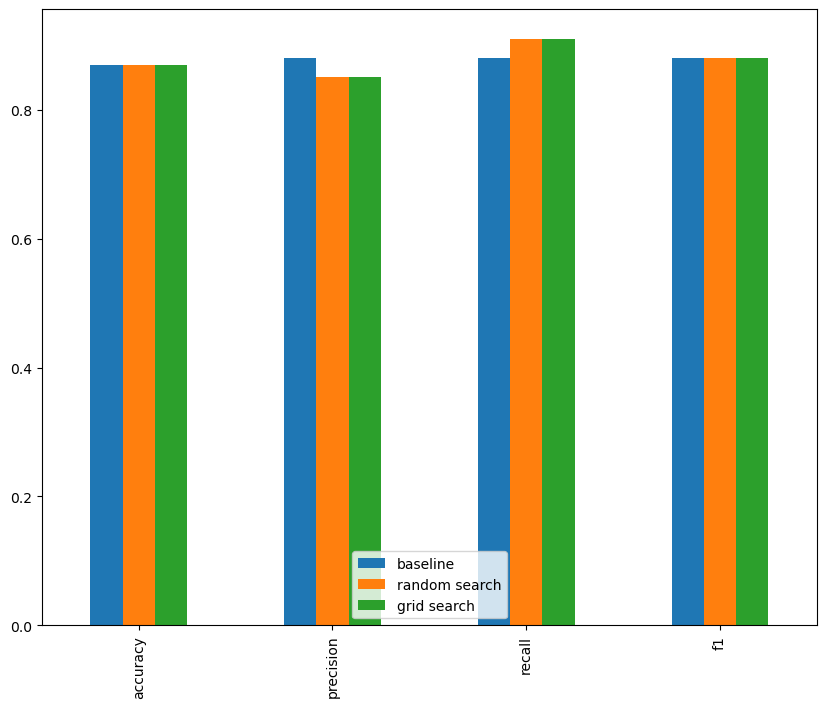

In [215]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

![](images/1.png)

![](images/2.png)

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme) 
5. Improve a model (Modeli geliştirin)  
6. Save and load  a trained model <---
7. Putting it all together!

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [216]:
import pickle

# Save an extisting model on file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [217]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [218]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

**Joblib**

In [219]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [220]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [221]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme) 
5. Improve a model (Modeli geliştirin)  
6. Save and load  a trained model 
7. Putting it all together! <---

## 7.Putting it all together!

![](images/things-to-remember.png)

In [222]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [223]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [224]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [226]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and tansformer pipeline
categorical_features = ["Make", "Colour"]
categorical_tansformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_tansformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [227]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4] 
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strat

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\Desktop\machine_learning_1\sample_project\env\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


In [228]:
gs_model.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems   
3. Fit the model/algorithm and use it to make predictions on our data (Modeli/algoritmayı yerleştirin ve onu verilerimiz üzerinde tahminlerde bulunmak için kullanın)
4. Evaluating a model (Modeli değerlendirme) 
5. Improve a model (Modeli geliştirin)  
6. Save and load  a trained model 
7. Putting it all together! 